Импорт библиотек и чтение файла

In [86]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random

with open('Москва_2021.txt', 'r') as file:
    boba = list(map(int, file.readlines()))
print(boba)

[23, 32, 27, 26, 44, 49, 63, 34, 66, 66, 38, 27, 28, 35, 26, 46, 62, 44, 22, 35, 31, 31, 27, 37, 32, 49, 31, 22, 18, 29, 30, 20, 31, 18, 69, 36, 28, 38, 62, 25, 38, 32, 31, 18, 48, 38, 40, 21, 25, 27, 44, 45, 29, 41, 24, 19, 29, 67, 41, 44, 25, 22, 42, 40, 21, 44, 29, 34, 63, 32, 49, 34, 35, 23, 45, 26, 36, 46, 36, 45, 38, 31, 24, 29, 41, 31, 27, 41, 33, 20, 45, 25, 40, 41, 32, 20, 41, 41, 57, 47, 22, 63, 21, 43, 19, 30, 25, 41, 44, 27, 34, 33, 26, 47, 19, 43, 48, 30, 19, 33, 36, 29, 27, 36, 45, 34, 20, 48, 32, 20, 66, 23, 48, 26, 43, 26, 22, 41, 19, 55, 21, 43, 45, 34, 25, 49, 19, 35, 51, 18, 34, 24, 42, 19, 37, 21, 31, 34, 32, 47, 49, 23, 35, 24, 29, 48, 29, 36, 34, 39, 39, 25, 23, 52, 31, 33, 48, 35, 24, 25, 28, 30, 34, 34, 19, 29, 39, 33, 38, 25, 47, 19, 31, 19, 22, 27, 27, 24, 38, 31, 33, 27, 22, 25, 32, 28, 24, 48, 37, 18, 28, 23, 56, 38, 30, 38, 29, 36, 19, 40, 41, 25, 26, 36, 25, 51, 22, 23, 21, 27, 21, 32, 42, 49, 26, 29, 27, 18, 30, 38, 22, 25, 25, 48, 21, 38, 49, 60, 64, 29,

Задание №1: Построение выборок и подсчет средних

In [216]:
# Подсчет объема выборок
y = 0.95
# Φ(t) = 0.95/2 = 0,4750. По функции Лапласа:
t = 1.96
N = 32423
d = 3
D = 144.9169680648149

n = math.ceil(t**2*D/d**2)

print(f'Объем выборок: {n}')

# Функция для вычисления выборочной средней
def calculate_average(selection):
    total = 0
    for age in selection:
        total += age
    return total / len(selection)

# Генерация выборок и расчет выборочной средней
averages = []
selections = []
for _ in range(36):
    selection = random.choices(boba, k=n)
    selections.append(selection)
    average = calculate_average(selection)
    averages.append(average)

# Результаты
print(f'Выборочные средние: {averages}')
print(f'Выборки: {selections}')

Объем выборок: 62
Выборочные средние: [35.12903225806452, 34.67741935483871, 38.483870967741936, 34.403225806451616, 35.12903225806452, 36.983870967741936, 34.67741935483871, 37.306451612903224, 33.064516129032256, 36.12903225806452, 32.83870967741935, 34.935483870967744, 35.016129032258064, 33.54838709677419, 34.903225806451616, 35.20967741935484, 34.70967741935484, 36.354838709677416, 33.983870967741936, 36.096774193548384, 32.403225806451616, 35.32258064516129, 35.74193548387097, 35.46774193548387, 39.24193548387097, 40.82258064516129, 31.919354838709676, 35.04838709677419, 34.62903225806452, 34.11290322580645, 33.483870967741936, 34.935483870967744, 36.0, 35.403225806451616, 33.95161290322581, 35.03225806451613]
Выборки: [[41, 44, 52, 43, 43, 46, 18, 25, 20, 34, 37, 29, 66, 48, 18, 36, 26, 31, 23, 29, 46, 42, 33, 69, 39, 42, 39, 35, 36, 25, 40, 24, 23, 20, 44, 31, 27, 39, 25, 26, 23, 22, 47, 19, 39, 29, 18, 64, 41, 42, 40, 21, 39, 38, 46, 26, 57, 45, 20, 28, 33, 27], [45, 20, 29, 1

Задание №2: построить интервальный ряд распределения, вычислить относительные частоты, построить гистограмму.

Правая граница: 41
Левая граница: 31


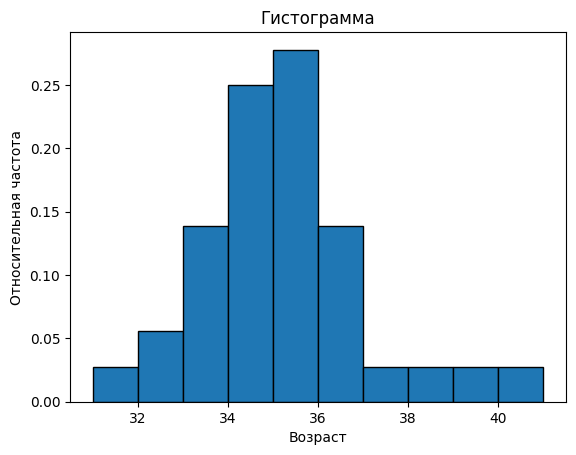

In [221]:
# Сортируем массив averages и берем левую, правую границы
sortedAverages = sorted(averages)
leftBorder = math.floor(min(averages))
rightBorder = math.ceil(max(averages))
print(f'Правая граница: {rightBorder}')
print(f'Левая граница: {leftBorder}')

# Создаем массив значений интервалов
intervals = np.arange(leftBorder, rightBorder + 1)
counts, _ = np.histogram(sortedAverages, bins = intervals)
freq = counts / len(sortedAverages)

# Генерируем гистограмму
plt.hist(sortedAverages, bins = intervals, range = (leftBorder, rightBorder), edgecolor='black', density = True)
plt.title('Гистограмма')
plt.xlabel('Возраст')
plt.ylabel('Относительная частота')
plt.show()

Задание №3: осуществить выравнивание статистического ряда, построить кривую Гаусса.

Интервальная средняя: 35.22222222222222
Среднее отклонение: 1.8297034667603147


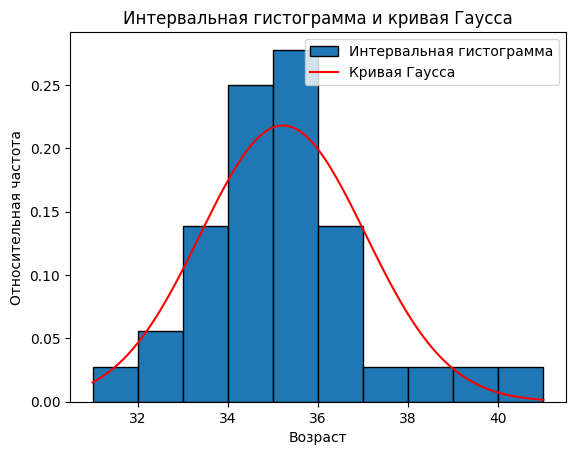

In [220]:
# Считаю интервальную среднюю
averageInterval = 0
for i in range(len(freq)):
    averageInterval += (intervals[i] + intervals[i + 1]) / 2 * freq[i]
print(f'Интервальная средняя: {averageInterval}')

# Считаю интервальную дисперсию
dispersionInterval = 0
for i in range(len(freq)):
    dispersionInterval += (((intervals[i] + intervals[i + 1]) / 2 - average) ** 2) * freq[i]

# Считаю среднее отклонение
standardDeviationInterval = dispersionInterval ** 0.5
print(f'Среднее отклонение: {standardDeviationInterval}')

# Функция для подсчета конкретного значения нормального распределения
def NormRasp(value, averageInterval, standardDeviationInterval):    
    result = 1 / (standardDeviationInterval * math.sqrt(2 * math.pi)) * math.exp(-((value - averageInterval) ** 2) / (2 * standardDeviationInterval ** 2))
    return result

# Подсчет всех значений кривой Гаусса на требуемых интервалах с ходом 0.1
normValues = []
intervals1 = np.arange(leftBorder, rightBorder+0.01, 0.1)
for i in range(len(intervals1)):    
    currentNormValue = NormRasp(intervals1[i], averageInterval, standardDeviationInterval)    
    normValues.append(currentNormValue)

# Построение гистограмы и кривой Гаусса
plt.hist(sortedAverages, bins = intervals, range = (leftBorder, rightBorder), edgecolor='black', density = True, label = "Интервальная гистограмма")
plt.plot(intervals1, normValues, label='Кривая Гаусса',  color='red')
plt.legend()
plt.title('Интервальная гистограмма и кривая Гаусса')
plt.xlabel('Возраст')
plt.ylabel('Относительная частота')
plt.show()

Задание №4: найти доверительный интервал

In [219]:
# Оценка среднего и дисперсии
mean = sum(selections[0]) / len(selections[0])
variance = sum((x - mean) ** 2 for x in selections[0]) / (len(selections[0]) - 1)

# Уровень значимости
alpha = 0.05  # (1 - y)
n = len(selections[0])

# t-критическое значение
t_critical = 1.671  # Для 61 степени свободы (n-1) и уровня значимости 0.05 

# Стандартная ошибка
standard_error = (variance / n) ** 0.5  

# Доверительный интервал
confidence_interval = (mean - t_critical * standard_error, mean + t_critical * standard_error)

print(f"Доверительный интервал для среднего возраста: {confidence_interval}")
print(f'Ошибка: {t_critical * standard_error}')
print(f'Средняя: {mean}')

Доверительный интервал для среднего возраста: (32.58809001429472, 37.66997450183432)
Ошибка: 2.540942243769798
Средняя: 35.12903225806452
